In [14]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [15]:
Nt = 2000
Nx = 10
x = np.linspace(0,2,Nx)
t = np.linspace(0,1000,Nt)

deltax = x[1] - x[0]
deltat = t[1] - t[0]

k = 0.0075

lambda_ = (k*deltat)/deltax**2
print(lambda_)

0.07597548774387194


In [16]:
def h1(t):
    return 100
def h2(t):
    return 20.

In [17]:
def initT():
    T = np.zeros((Nt,Nx))
    T[:,0] = h1(t[0])
    T[:,-1] = h2(t[0])
    return T

In [18]:
T = initT()

<IPython.core.display.Javascript object>


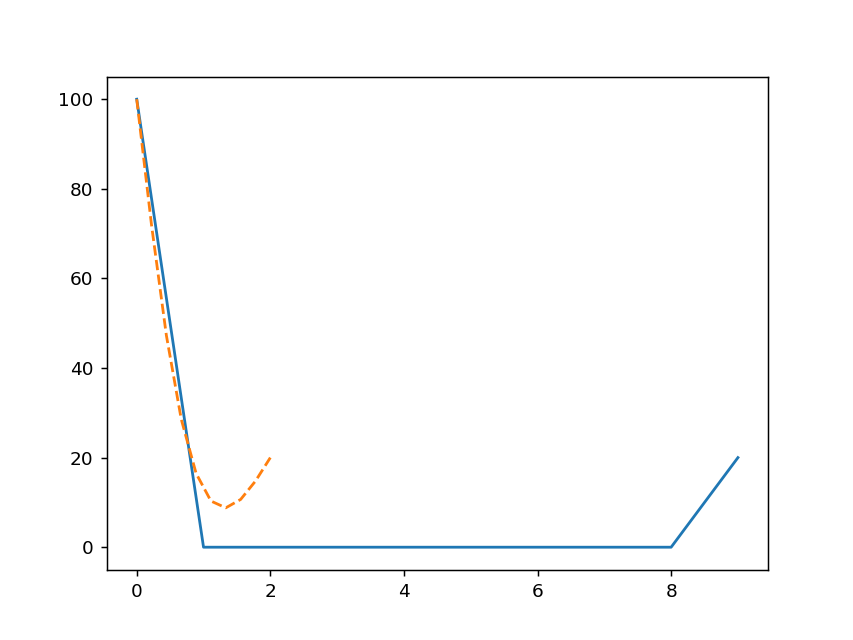

In [19]:
plt.plot(T[0,:])

In [20]:
def GetSolution(T):
    
    for l in tqdm(range(1,len(t))):
        
        for i in range(1,len(x)-1):
            
            T[l,i] = T[l-1,i] + lambda_*( T[l-1,i+1] - 2*T[l-1,i] + T[l-1,i-1] )

In [21]:
GetSolution(T)

100%|██████████████████████████████████████████████████████████████████████████████████████| 1999/1999 [00:00<00:00, 50056.50it/s]


<IPython.core.display.Javascript object>


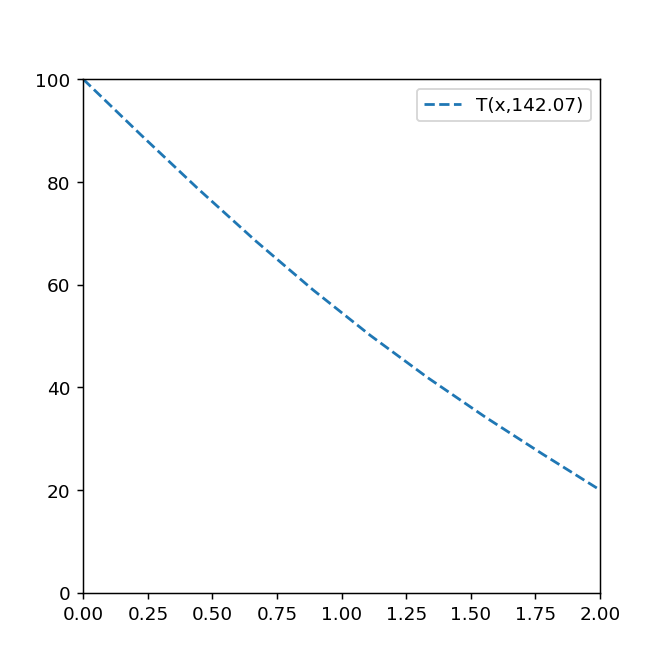

In [27]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    
    ax.clear()
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(0,100)
    
def Update(i):
    
    init()
    ax.plot(x,T[i,:],'--', label=r'T(x,%.2f)' %(t[i]))
    ax.legend()
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)